In [20]:
#for calculations
import pandas as pd
import numpy as np

#for data visualization
import seaborn as sns

#for ploting graphs
import matplotlib.pyplot as plt
%matplotlib inline

#to ignore any warning
import warnings
warnings.filterwarnings('ignore')


In [75]:
#files to read data
train=pd.read_csv('C:/train_file.csv')
test=pd.read_csv('C:/test_file.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.852030,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.852030,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,4.189655,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.787492,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.948760,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1


In [79]:
#make copy of the files
train_original=train.copy()
test_original=test.copy()
test_original.head()
#train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [80]:
#univariate variable analysis
#firstly for target varaible i.e loan status
train['Loan_Status'].value_counts()



Y    422
N    192
Name: Loan_Status, dtype: int64

In [81]:
#normalizing the loan status
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

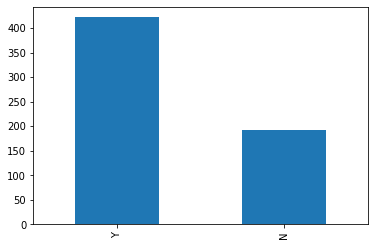

In [82]:
train['Loan_Status'].value_counts().plot.bar()

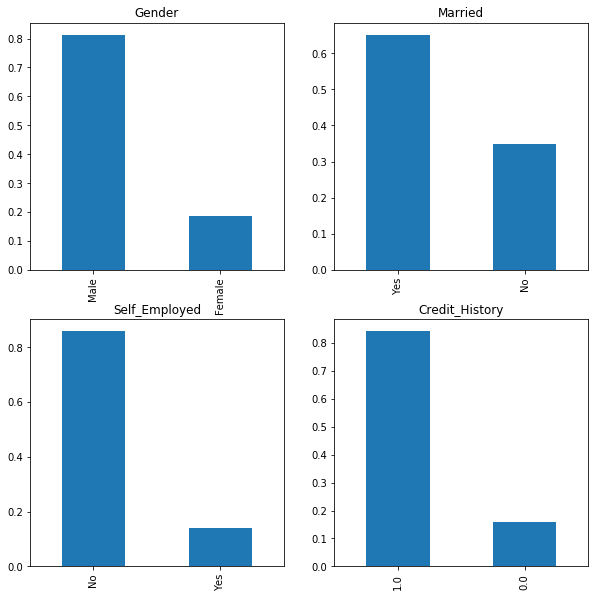

In [83]:
#visualize each category separatly
#1.categorial featurw
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

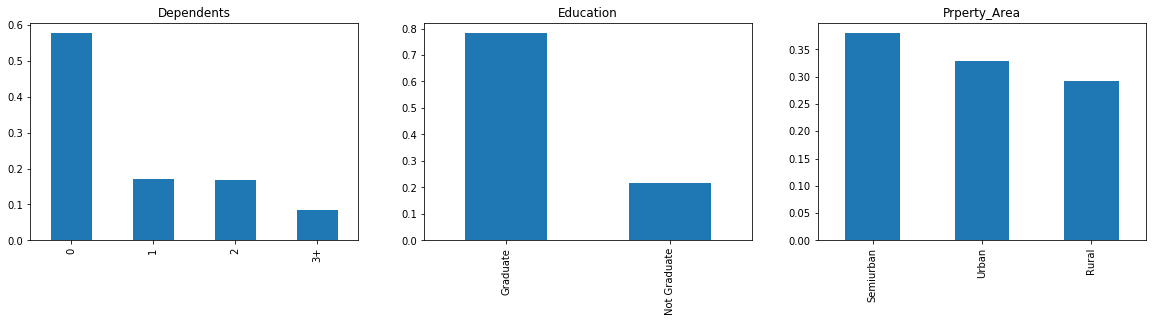

In [84]:
#ordinal fitures
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,4),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,4),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,4),title='Prperty_Area')
plt.show()

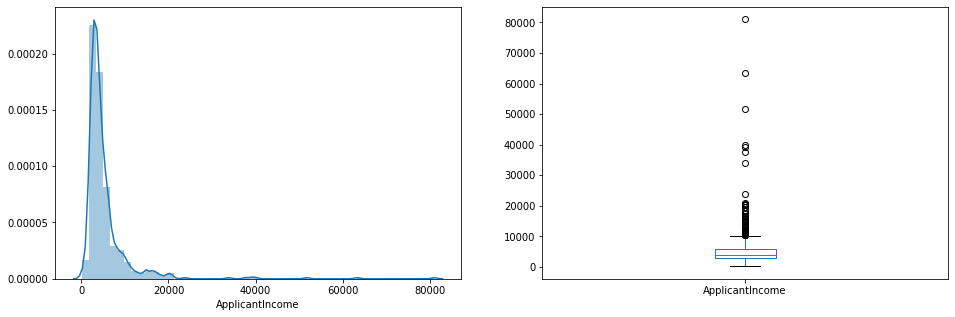

In [85]:
#numerical features
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

# sns.distplot(train['LoanAmount'])
plt.show()

Text(0.5, 0.98, '')

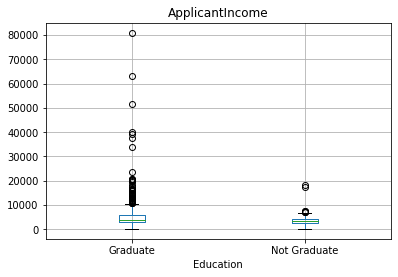

In [86]:
#segregate applicant income with their education
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

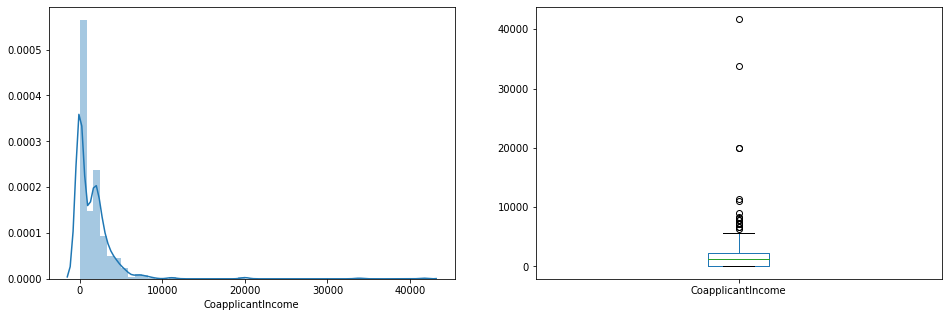

In [87]:
#co applicant income
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

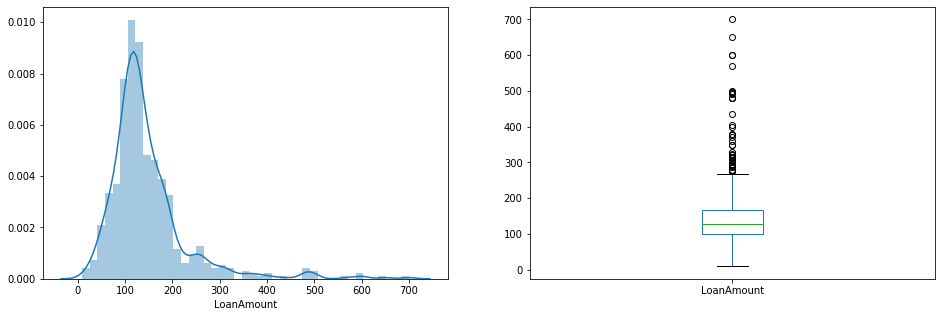

In [88]:
#LOAN AMOUNT
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

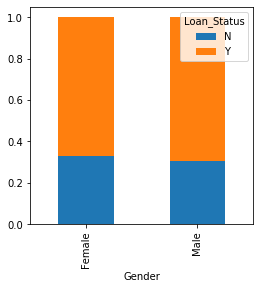

In [89]:
#now we will perform bivariate analysis
#exploration agaimst target variable
#1.categorial variable and target variable
#gender,married,self_employed,credit history
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

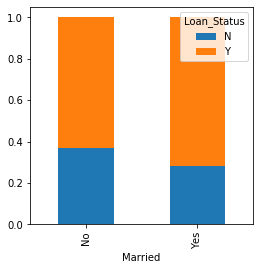

In [90]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

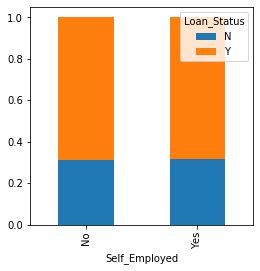

In [91]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

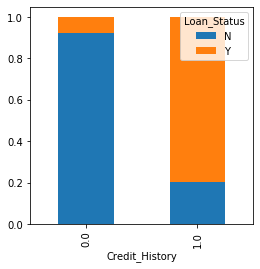

In [92]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

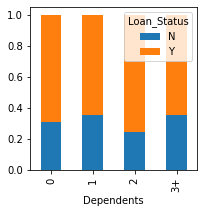

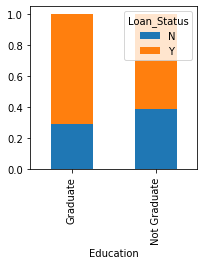

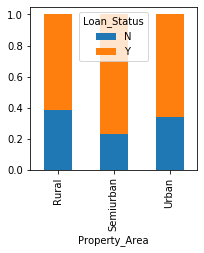

In [93]:
#ordinal features against target variable
#dependents,education,property area
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,3))
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,3))
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,3))
plt.show()

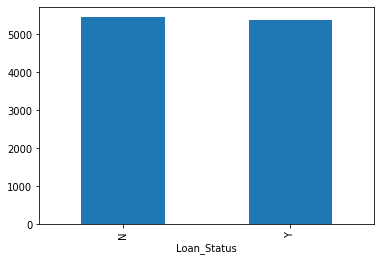

In [94]:
#numerical features against target variable
#we will find mean income for knowing the loan status
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

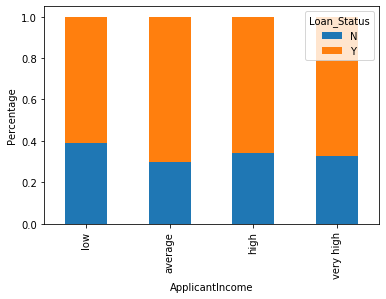

In [95]:
#make bins of income to analyze perfectly
bins=[0,2000,6000,10000,81000]
groups=['low','average','high','very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=groups)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

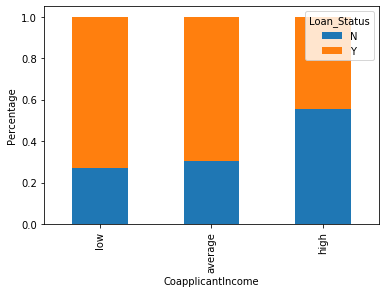

In [96]:
#co applicant income 
bins=[0,4000,8000,42000]
groups=['low','average','high']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=groups)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

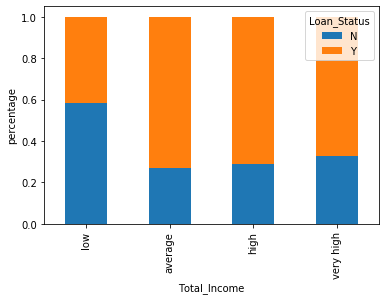

In [97]:
#visualize the combined effect of applicant's and coapplicant's income on loan status
train['Total_Income']=train['ApplicantIncome']+ train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
groups=['low','average','high','very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=groups)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('percentage')


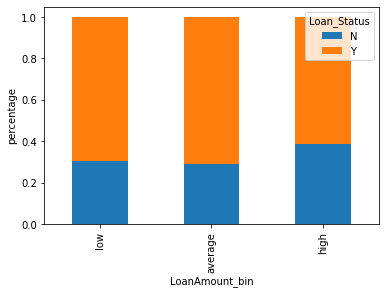

In [98]:
#loan amount variable
bins=[0,100,200,700]
groups=['low','average','high']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=groups)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount_bin')
P=plt.ylabel('percentage')


In [99]:
#we will drop bin variables
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin'],axis=1)

In [100]:
#we will make 3+ "dependents" 3 to make it numerical variable
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [101]:
#we will change the target values to 0 ans 1 to made them corelate with numerical variables
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

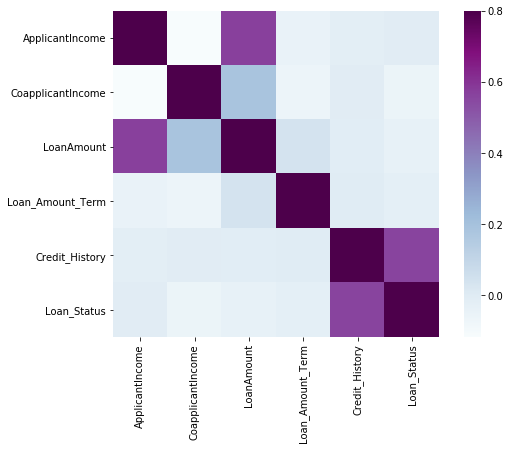

In [102]:
#now we will find corealtion between numerical value using heatmap
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [103]:
#missing value treatment
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
#will treat missing values in categorial features through mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [105]:
#value count of loan amount term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [106]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [107]:
#fill the missing values in loan amount with median
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [108]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [109]:
train['Dependents'].fillna(train['Dependents'].median(),inplace=True)

In [110]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [111]:
#lets fill the missing values in test set also
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Dependents'].fillna(test['Dependents'].median(),inplace=True)

In [112]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

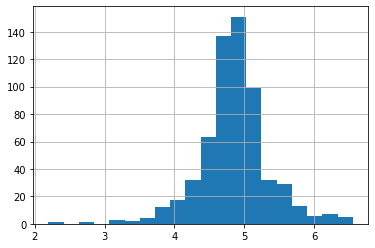

In [113]:
#treatment of outliers in loan amount by doing log transformation
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [114]:
#same to the test dataset
test['LoanAmount_log']=np.log(train['LoanAmount'])

In [134]:
#lets make a logistic model and make prediction
#lets first drop the loan id variable as it didnt effect the loan status
# train=train.drop('Loan_ID',axis=1)
#test=test.drop('Loan_ID',axis=0)


In [116]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [159]:
#lets make dummy variable of categorial variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [160]:
#we will divide our train dataset into two parts to validate it
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)


In [153]:
#now import logistic regression and accuracy score to fit the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
#lets predict the loan status for validation set and check accuracy
pred_cv=model.predict(x_cv)
#calculate accuracy
accuracy_score(y_cv,pred_cv)

0.8432432432432433

In [140]:
#predict the loan status for test data set
pred_test=model.predict(test)

In [141]:
#lets import the submission file
submission=pd.read_csv('C:/sample_file.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [143]:
#submission['Loan_Status']=pred_test

In [126]:
#submission['Loan_ID']=test['Loan_ID']

In [127]:
#lets convert 1 and 0 to Y and N
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [128]:
#lets check accuracy of the submission
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')


In [129]:
#NOW we will cross validate our dataset using stratisfied K fold cross validation method
from sklearn.model_selection import StratifiedKFold


In [144]:
#lets make logistic cross validation model
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
   # pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7868852459016393


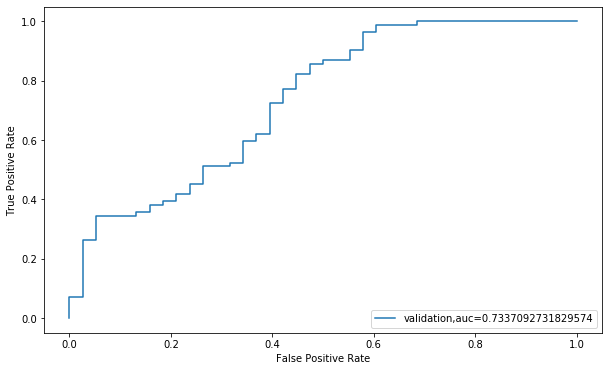

In [145]:
#visualization of ROC curve
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label='validation,auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [146]:
#submission['Loan_ID']=test['Loan_ID']
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')


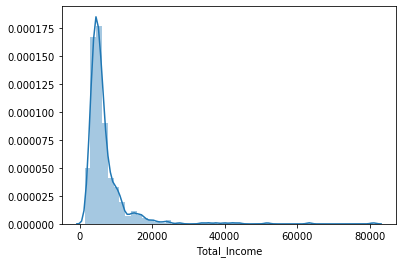

In [147]:
#some new features that can effect the target variable that are total income,EMI,Balance income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income'])


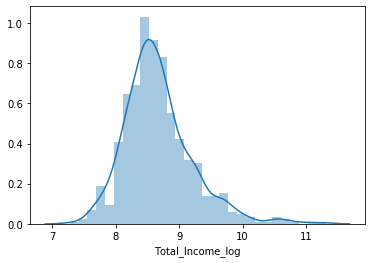

In [148]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [149]:
test['Total_Income_log']=np.log(test['Total_Income'])

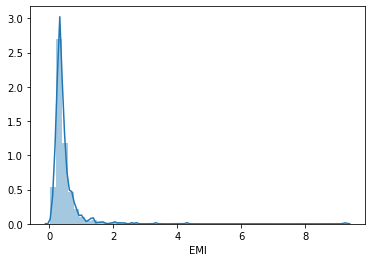

In [150]:
#lets create EMI features
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI'])

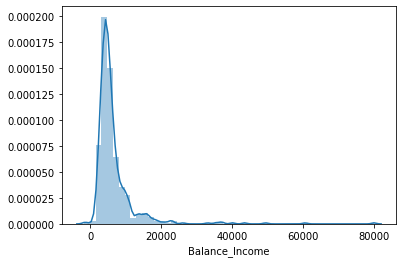

In [151]:
#lets create balance income
train['Balance_Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance_Income'])

In [152]:
#let us drop the variable which we used to create the new features
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [154]:
#model building part 2
#prepare the data to feeding into the model
X=train.drop('Loan_Status',1)
y=train.Loan_Status
#logistic regression model
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    #pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy score 0.7398373983739838

2 of kfold 5
accuracy score 0.6910569105691057

3 of kfold 5
accuracy score 0.6666666666666666

4 of kfold 5
accuracy score 0.7967479674796748

5 of kfold 5
accuracy score 0.680327868852459


In [155]:
#THE MEAN ACCURACY OF THIS MODEL IS 0.712

In [156]:
#fill loan status with prediction
# submission['Loan_Status']=pred_test
# submission['Loan_ID']=test_original['Loan_ID']


In [157]:
#converting submission file to csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

In [158]:
#### ***DECISION TREE***####
from sklearn import tree

In [161]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    #pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy score 0.7967479674796748

2 of kfold 5
accuracy score 0.7642276422764228

3 of kfold 5
accuracy score 0.7479674796747967

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7131147540983607


In [162]:
#validation accuracy of this model is 0.75

In [164]:
#####****RANDOM FOREST****#####
from sklearn.ensemble import RandomForestClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    #pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy score 0.8211382113821138

2 of kfold 5
accuracy score 0.7642276422764228

3 of kfold 5
accuracy score 0.7642276422764228

4 of kfold 5
accuracy score 0.7479674796747967

5 of kfold 5
accuracy score 0.7131147540983607


In [ ]:
#validation accuracy of this model is also 0.75
##########****************##############***************###############**************###########***************################